In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('/Users/kartikamusle/Downloads/Fraud_Analysis_Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [3]:
df.shape

(11142, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [5]:
print("Transaction types distribution:")
print(df['type'].value_counts())
print("\nPercentage of each transaction type:")
print(df['type'].value_counts(normalize=True) * 100)

Transaction types distribution:
type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64

Percentage of each transaction type:
type
PAYMENT     49.452522
CASH_IN     17.510321
CASH_OUT    16.792317
TRANSFER    13.139472
DEBIT        3.105367
Name: proportion, dtype: float64


In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
print(df['isFraud'].value_counts())

isFraud
0    10000
1     1142
Name: count, dtype: int64


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


# EDA

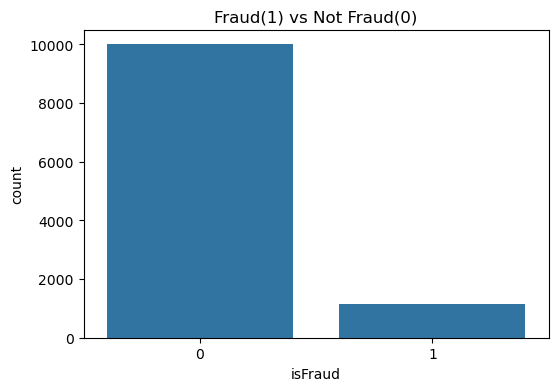

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=df)
plt.title('Fraud(1) vs Not Fraud(0)')
plt.show()

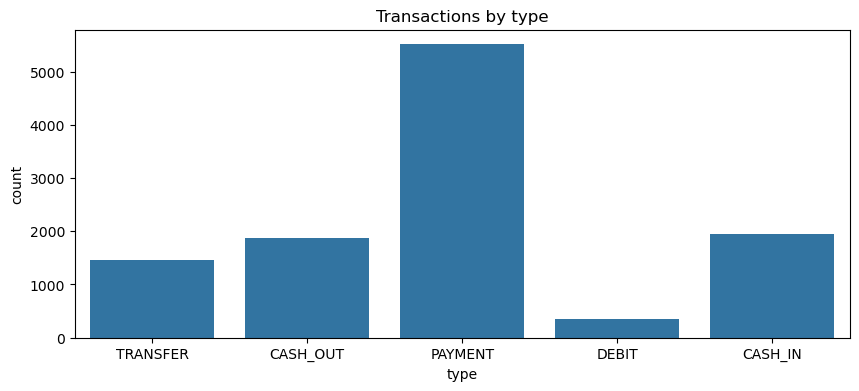

In [11]:
plt.figure(figsize=(10,4))
sns.countplot(x='type', data=df)
plt.title('Transactions by type')
plt.show()

/var/folders/_c/w90j7c8s0ng2vn3jbt_9h1cw0000gn/T/ipykernel_3265/1568938974.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='type', y='isFraud', data=df, ci= None)


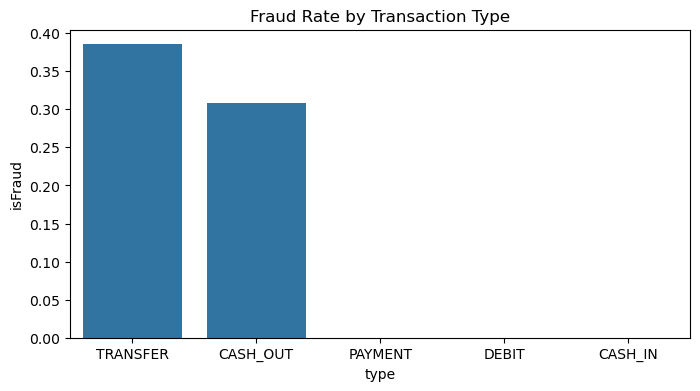

In [12]:
plt.figure(figsize=(8,4))
sns.barplot(x='type', y='isFraud', data=df, ci= None)
plt.title('Fraud Rate by Transaction Type')
plt.show()

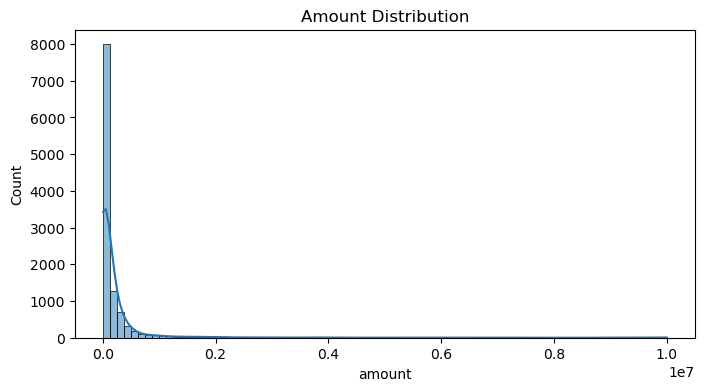

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df['amount'],bins= 80, kde= True)
plt.title('Amount Distribution')
plt.show()

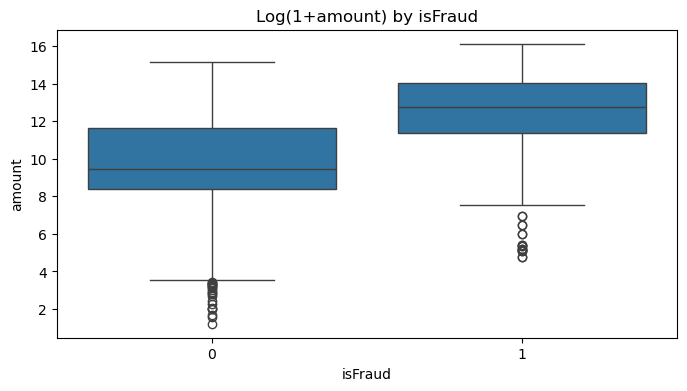

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(x='isFraud', y=np.log1p(df['amount']), data=df)
plt.title('Log(1+amount) by isFraud')
plt.show()

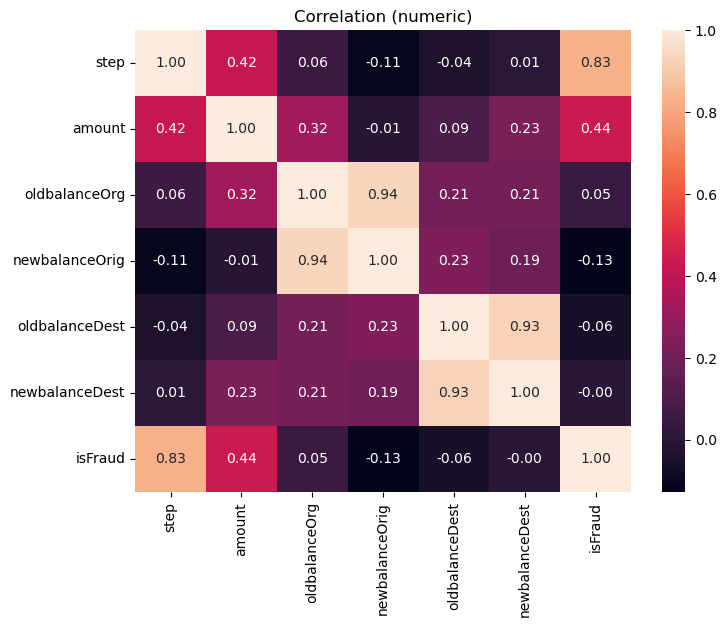

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt='.2f')
plt.title('Correlation (numeric)')
plt.show()

# Feature Engineeering

In [16]:
#Balance changes
df['OrigBalanceChange'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['DestBalanceChange'] = df['newbalanceDest'] - df['oldbalanceDest']

#Amount Difference
df['amount_to_oldOrig'] = df['amount'] / (df['oldbalanceOrg'] + 1)
df['amount_to_oldDest'] = df['amount'] / (df['oldbalanceDest'] +1)

df['dest_is_customer'] = df['nameDest'].str.startswith('C').astype(int)

df['log_amount'] = np.log1p(df['amount'])

df_model = df.drop(columns=['nameOrig', 'nameDest'])

In [17]:
df_model.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,OrigBalanceChange,DestBalanceChange,amount_to_oldOrig,amount_to_oldDest,dest_is_customer,log_amount
0,1,TRANSFER,181.00,181.00,0.0,0.0,0.00,1,-181.00,0.00,0.994505,1.810000e+02,1,5.204007
1,1,CASH_OUT,181.00,181.00,0.0,21182.0,0.00,1,-181.00,-21182.00,0.994505,8.544588e-03,1,5.204007
2,1,TRANSFER,2806.00,2806.00,0.0,0.0,0.00,1,-2806.00,0.00,0.999644,2.806000e+03,1,7.939872
3,1,CASH_OUT,2806.00,2806.00,0.0,26202.0,0.00,1,-2806.00,-26202.00,0.999644,1.070870e-01,1,7.939872
4,1,TRANSFER,20128.00,20128.00,0.0,0.0,0.00,1,-20128.00,0.00,0.999950,2.012800e+04,1,9.909917
5,1,CASH_OUT,20128.00,20128.00,0.0,6268.0,12145.85,1,-20128.00,5877.85,0.999950,3.210719e+00,1,9.909917
6,1,CASH_OUT,416001.33,0.00,0.0,102.0,9291619.62,1,0.00,9291517.62,416001.330000,4.038848e+03,1,12.938446
7,1,TRANSFER,1277212.77,1277212.77,0.0,0.0,0.00,1,-1277212.77,0.00,0.999999,1.277213e+06,1,14.060192
8,1,CASH_OUT,1277212.77,1277212.77,0.0,0.0,2444985.19,1,-1277212.77,2444985.19,0.999999,1.277213e+06,1,14.060192
9,1,TRANSFER,35063.63,35063.63,0.0,0.0,0.00,1,-35063.63,0.00,0.999971,3.506363e+04,1,10.464948


# Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_model['type'] = le.fit_transform(df_model['type'])
df_model.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,OrigBalanceChange,DestBalanceChange,amount_to_oldOrig,amount_to_oldDest,dest_is_customer,log_amount
0,1,4,181.0,181.0,0.0,0.0,0.0,1,-181.0,0.0,0.994505,181.000000,1,5.204007
1,1,1,181.0,181.0,0.0,21182.0,0.0,1,-181.0,-21182.0,0.994505,0.008545,1,5.204007
2,1,4,2806.0,2806.0,0.0,0.0,0.0,1,-2806.0,0.0,0.999644,2806.000000,1,7.939872
3,1,1,2806.0,2806.0,0.0,26202.0,0.0,1,-2806.0,-26202.0,0.999644,0.107087,1,7.939872
4,1,4,20128.0,20128.0,0.0,0.0,0.0,1,-20128.0,0.0,0.999950,20128.000000,1,9.909917


# Outlier Detection

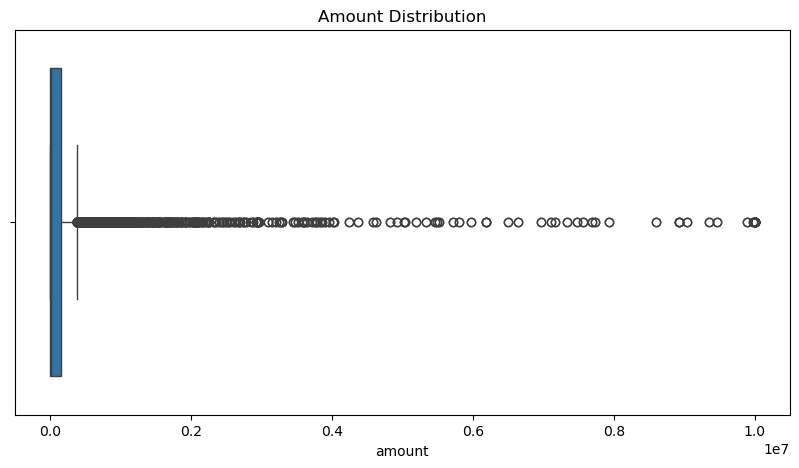

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='amount', data=df)
plt.title('Amount Distribution')
plt.show()

In [20]:
df['amount_log'] = np.log1p(df['amount'])


In [21]:
from sklearn.model_selection import train_test_split
X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)

# Handling Imbalance Data using SMOTE

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check shapes
print("Training set after SMOTE:", X_train_smote.shape)
print("Fraud distribution after SMOTE:\n", y_train_smote.value_counts())


Training set after SMOTE: (15998, 13)
Fraud distribution after SMOTE:
 isFraud
0    7999
1    7999
Name: count, dtype: int64


# Standard Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = X_train_smote.copy()
X_test_scaled = X_test.copy()

numeric_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_smote[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])


# Logistic Regression - Accuracy 97%

In [24]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state =42)
lr_model.fit(X_train_scaled, y_train_smote)

y_pred_lr = lr_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Accuracy: 0.971736204576043
Precision: 0.8367346938775511
Recall: 0.8991228070175439
F1-Score: 0.8668076109936576
Confusion Matrix:
 [[1961   40]
 [  23  205]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest - Accuracy 99% Overfit

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train_smote)

y_pred_rf = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9995513683266039
Precision: 1.0
Recall: 0.9956140350877193
F1-Score: 0.9978021978021978
Confusion Matrix:
 [[2001    0]
 [   1  227]]


# XG Booster

In [26]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state = 42, n_estimators=100, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train_smote)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.9991027366532077
Precision: 1.0
Recall: 0.9912280701754386
F1-Score: 0.9955947136563876
Confusion Matrix:
 [[2001    0]
 [   2  226]]


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [27]:
# Add predicted class and predicted probability to X_test
X_test_eda = X_test_scaled.copy()
X_test_eda['actual'] = y_test.values
X_test_eda['predicted'] = lr_model.predict(X_test_scaled)
X_test_eda['prob_fraud'] = lr_model.predict_proba(X_test_scaled)[:,1]

X_test_eda.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,OrigBalanceChange,DestBalanceChange,amount_to_oldOrig,amount_to_oldDest,dest_is_customer,log_amount,actual,predicted,prob_fraud
4522,-0.884133,3,-0.401841,-0.404170,-0.199719,-0.319656,-0.401681,-23147.49,0.00,0.136682,23147.490000,0,10.049685,0,0,0.017454
7816,-0.738901,3,-0.405132,-0.466651,-0.280968,-0.319656,-0.401681,-17978.87,0.00,0.575508,17978.870000,0,9.797008,0,0,0.024829
1494,-0.920441,4,-0.352481,-0.480784,-0.289072,0.014029,-0.380124,0.00,-645593.00,100677.860000,0.143504,1,11.519691,0,0,0.016859
1713,-0.920441,3,-0.415269,-0.480784,-0.289072,-0.319656,-0.401681,0.00,0.00,2056.590000,2056.590000,0,7.629291,0,0,0.007290
1506,-0.920441,4,-0.313938,-0.480784,-0.289072,-0.224657,1.755873,0.00,5402501.95,161217.610000,0.807162,1,11.990517,0,0,0.000167


In [28]:
# Top 10 transactions with highest predicted fraud probability
top_frauds = X_test_eda.sort_values('prob_fraud', ascending=False).head(10)
top_frauds[['prob_fraud','actual','predicted']]


,prob_fraud,actual,predicted
229,1.0,1,1
463,1.0,1,1
792,1.0,1,1
803,1.0,1,1
197,1.0,1,1
1119,1.0,1,1
648,1.0,1,1
133,1.0,1,1
769,1.0,1,1
146,1.0,1,1


# Classification Report

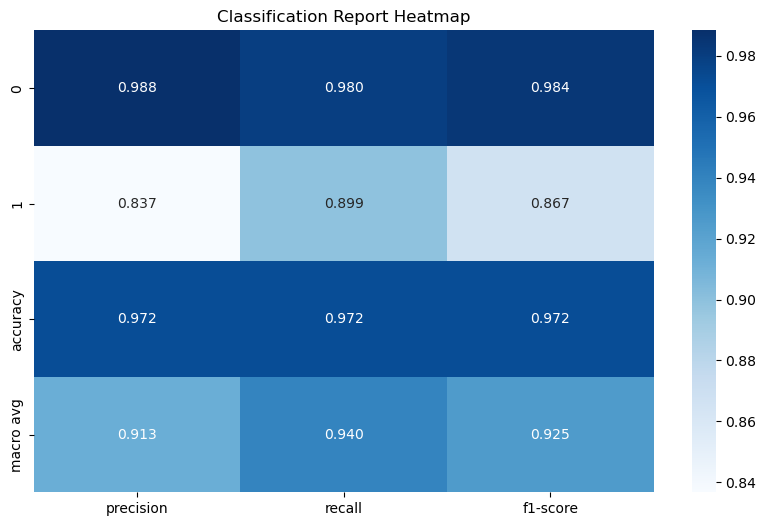

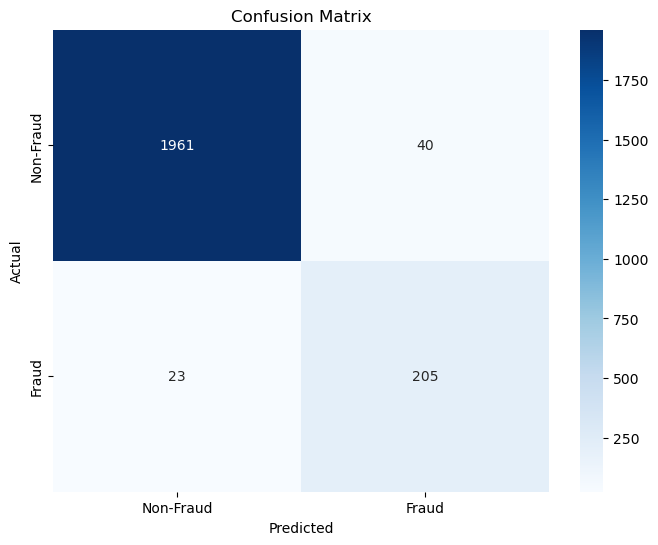

In [29]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_lr, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.3f')
plt.title('Classification Report Heatmap')
plt.show()

# Plot the confusion matrix properly
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Hyperparameter Tuning

In [30]:
# Tune Logistic Regression - less prone to overfitting
from sklearn.model_selection import GridSearchCV

# Logistic Regression parameter grid
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers that support both L1 and L2
}

# Use F1-score for scoring (better for imbalanced data)
lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    lr_param_grid,
    cv=5,
    scoring='f1',  # Focus on F1-score, not accuracy
    n_jobs=-1
)

lr_grid.fit(X_train_scaled, y_train_smote)

print("Best Logistic Regression Parameters:", lr_grid.best_params_)
print("Best F1-Score:", lr_grid.best_score_)

Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1-Score: 0.9856153645878655


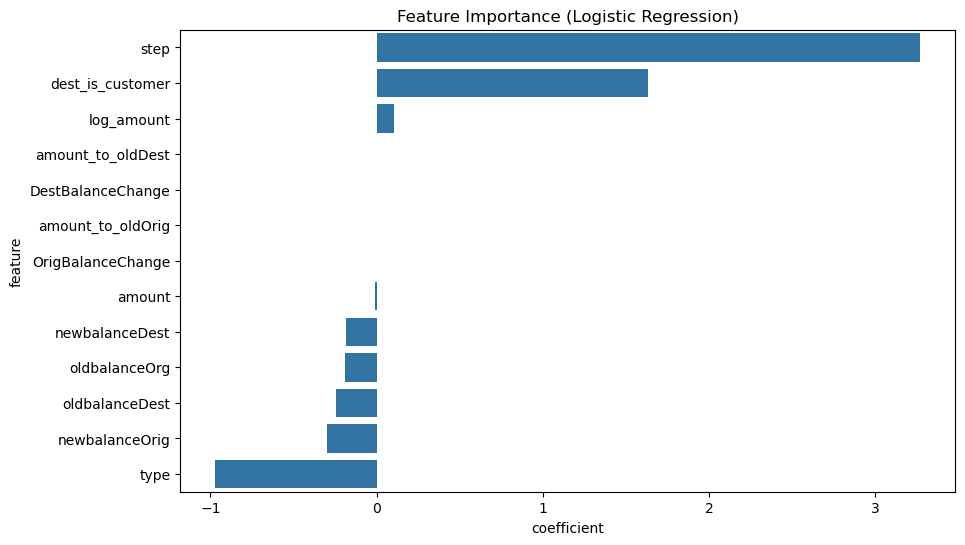

In [31]:
# Logistic Regression coefficients
coef_df = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': lr_model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='coefficient', y='feature', data=coef_df)
plt.title("Feature Importance (Logistic Regression)")
plt.show()


In [38]:
import joblib

# Suppose your trained model is called lr_model
joblib.dump(lr_model, 'fraud_detection.pkl')


['fraud_detection.pkl']